# Giving a custom circuit as an input

A general circuit can be defined as an input file or an input string. This notebook shows how to use this tool for a Fluxonium circuit, the same procedure can be used to analyze any general circuit.

The following input file can be used for a Fluxonium qubit. This is, for example, stored in `fluxonium_sym.inp` text file.
```
nodes: 2
branches:
JJ	1,2	Ej	Ecj
L	1,2	El
C	1,2	Ec
```
Do note that the program is still in the early stages and the input method is particular about following the format exactly. Make sure to not include any empty lines or innecessary characters, else the code may not function properly. The circuit can be imported to make an object using the command:

The above input can also be given in the form of a string using the method `from_input_string`. The input strings for the following qubits is provided at `scqubits.core.analyzeqcircuit`.
- Transmon : `transmon`
- Fluxonium: `fluxonium`
- Cos2Phi : `cos2phi`
- Zero-Pi : `zero_pi`

They can be imported using the function `example_circuit`.

In [1]:
import numpy as np
import scqubits as scq
from scqubits.core.analyzeqcircuit import example_circuit

In [2]:
# fluxonium = scq.AnalyzeQCircuit.from_input_string(example_circuit("fluxonium"))
fluxonium = scq.AnalyzeQCircuit.from_input_file("fluxonium_sym.inp")

AnalyzeQCircuit object is initiated using the keyword `mode` which is set to `"sym"` by default, which assumes that the parameters of the branches in the input file or string are symbol names. when `mode` is set to `"num"`, the code looks for numeric values to the parameters. This is particularly important when the circuit is large (having more than 6 nodes or a relatively large number of branches) as the symbolic computation can get heavy, which can be avoided by providing the numerical parameters directly. For the same, make an input file `fluxonium_num.inp` in the following way:
```
nodes: 2
branches:
JJ	1,2	10	5
L	1,2	5
C	1,2	2
```

and the AnalyzeQCircuit can be initiate using the following command.
```
fluxonium = scq.AnalyzeQCircuit.from_input_file("fluxonium_num.inp", mode = "num")
```

The methods used to compute eigen values and parameter sweeps are identical.

In [3]:
fluxonium.potential

-Ej*cos(Φ1 - 1.0*θ1) + 0.5*El*θ1**2

In [4]:
# fluxonium = scq.AnalyzeQCircuit.from_input_file("fluxonium_sym.inp")
fluxonium = scq.AnalyzeQCircuit.from_input_string(example_circuit("fluxonium"))

The AnalyzeQCircuit object automatically initializes some functions which do the following:
- Find all the cyclic and periodic variables of the circuit and make a variable transformation to a new set of generalized flux variables.
- Identify the independent loops in the circuit and automatically assign an external flux variable to one of the branches in the superconducting loops found.
- Compute the Lagrangian and Hamiltonian in terms of the new variables.

The computed properties of the circuit can be accessed using the following attributes.

In [5]:
fluxonium.L # Lagrangian

0.5*C1*vθ1**2 + 0.5*C2*vθ1**2 + Ej*cos(Φ1 - 1.0*θ1) - 0.5*El*θ1**2

In [6]:
fluxonium.H.expand() # Hamiltonian

-Ej*cos(Φ1 - 1.0*θ1) + 0.5*El*θ1**2 + 0.5*Q1**2/(0.125/Ecj + 0.125/Ec)

In [7]:
fluxonium.external_flux_vars # shows the identified external flux variables in the circuit

[Φ1]

# Setting the parameters

The circuit paramaters are set using attributes. The attributes are automatically defined with default values for each of the paramater in `param_vars` and `external_flux_vars`.

In this example, the paramaters can be set using `fluxonium.Ec`, `fluxonium.Ej` etc. and similarly for external flux `fluxonium.Φ1`.

In [8]:
fluxonium.param_vars # shows the independent symbols used to define the circuit parameters in the input file 

[Ec, El, Ej, Ecj]

In [9]:
print(fluxonium.Ec) # default value when it is not set by the user
fluxonium.Ec = 10 # setting the paramaters
fluxonium.Ecj = 15000
fluxonium.El = 2
fluxonium.Φ1 = 3

1.0


All the paramaters that are currently set can be seen at once using the method `get_params` and the external fluxes set using the method `get_external_flux`. Do note that the methods return a list of numbers which correspond to the symbols returned by the attributes `param_vars` and `external_flux_vars` 

In [10]:
print(fluxonium.get_params())
print(fluxonium.get_external_flux())

[10, 2, 1.0, 15000]
[3]


# Setting the cutoffs

The cutoffs for the circuit should be set according to the type of the variable identified by the code. For example, for this circuit, the type of the identified variables in the Hamiltonian can be seen using the attribute `var_indices`. 

In [11]:
fluxonium.H.expand()

-Ej*cos(Φ1 - 1.0*θ1) + 0.5*El*θ1**2 + 0.5*Q1**2/(0.125/Ecj + 0.125/Ec)

In [12]:
fluxonium.var_indices # shows the basis used for the index of the variable specified. In this case
# the index 1 refers to all the variables with subscript 1.

{'periodic': [], 'discretized_phi': [1], 'cyclic': [], 'zombie': []}

The cutoffs corresponding to the cyclic variables can be set using the attribute `cutoff_cyclic_i` where i is ith variable in the above dictionary of var_indices, similarly `cutoff_periodic_i` for periodic and `cutoff_discrete_i` for discretized phi variables. In this example, the cutoff can be set using:

In [24]:
fluxonium.cutoff_discrete_1 = 100

# Eigen values and parameter sweeps

The eigen values can now be calculated using the method `eigenvals`.

In [25]:
fluxonium.eigenvals()

array([ 6.10401249, 19.40766735, 31.68069898, 43.99603881, 56.61032529,
       69.40742482])

A parameter sweep can be plotted using the following command:

Spectral data:   0%|          | 0/99 [00:00<?, ?it/s]

(<Figure size 432x288 with 1 Axes>,
 <AxesSubplot:xlabel='Ej', ylabel='energy [GHz]'>)

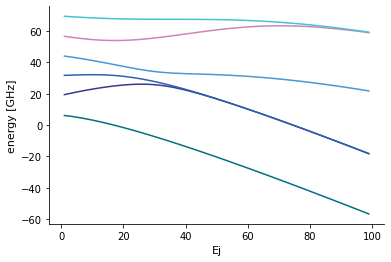

In [26]:
fluxonium.plot_evals_vs_paramvals("Ej", range(1,100), evals_count = 6)

Spectral data:   0%|          | 0/10 [00:00<?, ?it/s]

(<Figure size 432x288 with 1 Axes>,
 <AxesSubplot:xlabel='Φ1', ylabel='energy [GHz]'>)

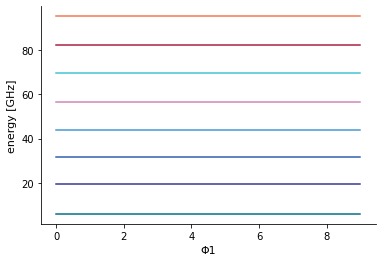

In [27]:
fluxonium.plot_evals_vs_paramvals("Φ1", range(0,10), evals_count=8)

# Plotting Energy Dispersion
(Taken from https://scqubits.readthedocs.io/en/latest/guide/ipynb/basics.html)

Plots of the energy dispersion, can be obtained easily:

Do note that the dispersion can be calculated for any of the variables or operators in self.params or self.vars.

either for individual energy levels:

In [28]:
fluxonium._id_str = fluxonium._autogenerate_id_str()

Bare spectra:   0%|          | 0/500 [00:00<?, ?it/s]

(<Figure size 432x288 with 1 Axes>,
 <AxesSubplot:xlabel='Ej/Ec', ylabel='energy dispersion [GHz]'>)

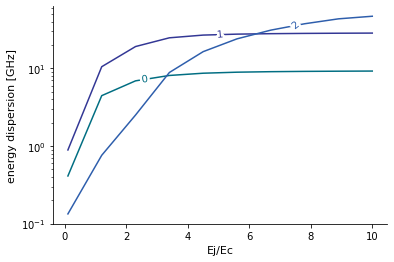

In [29]:
import numpy as np
fluxonium.plot_dispersion_vs_paramvals('Φ1', 'Ej', np.linspace(1,100,10), ref_param='Ec', levels=(0,1,2))

Or for transition energies:

Bare spectra:   0%|          | 0/500 [00:00<?, ?it/s]

(<Figure size 432x288 with 1 Axes>,
 <AxesSubplot:xlabel='Ej/Ec', ylabel='energy dispersion [GHz]'>)

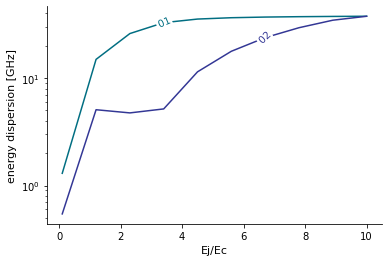

In [30]:
fluxonium.plot_dispersion_vs_paramvals('Φ1', 'Ej', np.linspace(1,100,10), ref_param='Ec', transitions=(((0,1), (0,2))))

# Internal variables for eigen value computation

Internally, this Hamiltonian is converted by certain substitutions to make the computation of the eigenvalues easier. The operators generated are associated to the variables in the attribute `vars`.

The `vars` attribute returns a list of three lists. The list is arranged in the following way:
```
[

[cyclic variables: ni or charge operator],

[periodic variables: [sin(yi): sin of the operator in charge basis], [cos(yi): cosine of the operator in charge basis], [ni: charge operator]],

[discretized_phi variables: [yi: discretized_phi operator], [pi: momentum operator], [psi: square of the momentum operator]]

]
```
`i` is the variable index as used in the Hamiltonian.

In [31]:
fluxonium.H.expand()

-Ej*cos(Φ1 - 1.0*θ1) + 0.5*El*θ1**2 + 0.5*Q1**2/(0.125/Ecj + 0.125/Ec)

In [32]:
fluxonium.vars

[[], [[], [], []], [[θ1], [Q1], [Qs1]]]

In this example, we can see that the code identifies the circuit to have one generalized flux (with index `1`) variable in the discretized phi basis. The paramater `vars` shows the operators generated by the code internally to calculate the eigenvalues. 

These operators can be analyzed using the follwing methods:

(<Figure size 720x360 with 3 Axes>, (<Axes3DSubplot:>, <AxesSubplot:>))

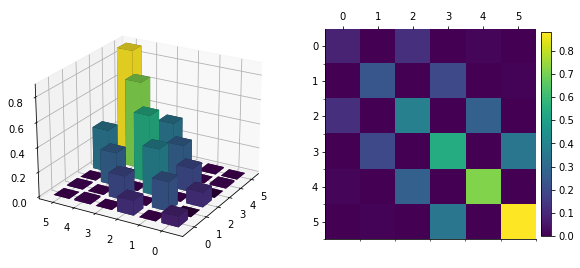

In [33]:
fluxonium.plot_matrixelements("Qs1")

Spectral data:   0%|          | 0/9 [00:00<?, ?it/s]

  0%|          | 0/9 [00:00<?, ?it/s]

(<Figure size 432x288 with 1 Axes>,
 <AxesSubplot:xlabel='Ec', ylabel='matrix element'>)

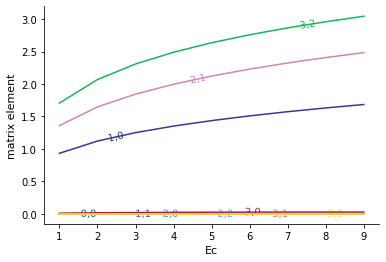

In [34]:
fluxonium.plot_matelem_vs_paramvals("θ1", "Ec", range(1,10))